<a href="https://colab.research.google.com/github/Adi9961/My-Projects/blob/master/FACE_MASK_DETECTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FACE MASK DETECTION  MODEL ON WEBCAM

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded=files.upload()

Saving facedetecttitled.jpeg to facedetecttitled.jpeg


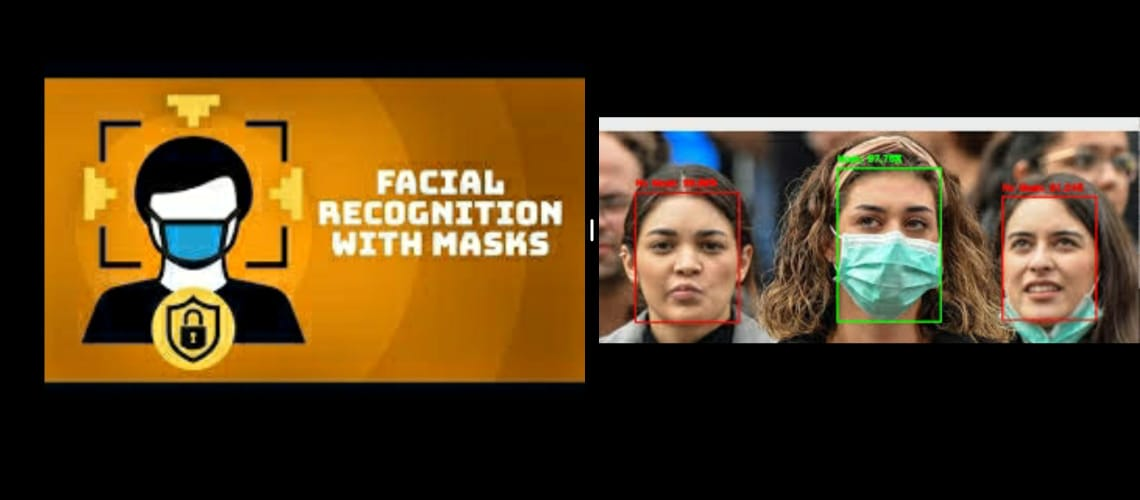

In [ ]:
Image('facedetecttitled.jpeg',width=1000)

**#Imorting the google drive for reading the required data from it**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**#Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


**#Imorting/Printing the data**



In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset.csv')
df

,Unnamed: 0,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,253,252,245,198,196,204,206,210,213,215,216,212,207,201,193,50,93,115,65,101,99,83,68,61,44,28,80,66,88,49,74,65,90,97,93,104,104,96,...,216,214,213,216,214,219,215,214,211,214,225,222,190,46,24,15,18,11,14,17,68,233,231,225,230,234,232,232,232,232,232,233,234,232,223,232,141,16,17,16
1,1,0,21,20,20,21,21,20,19,19,21,21,22,22,22,22,21,21,27,95,178,186,193,203,184,205,193,171,154,134,132,132,137,139,111,121,113,138,155,144,...,138,149,155,160,167,168,169,166,166,162,158,154,150,143,133,117,90,28,14,14,14,14,14,14,16,22,20,15,15,15,15,15,15,15,15,15,15,15,15,15
2,2,0,255,255,255,255,255,253,254,254,255,254,255,255,255,255,255,254,254,254,254,254,254,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,...,253,252,247,248,248,233,208,159,99,75,72,84,96,104,90,100,105,88,78,33,71,87,97,97,101,90,94,95,101,98,97,92,96,102,95,85,71,149,252,253
3,3,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,22,22,22,22,22,20,21,18,21,20,20,19,16,15,14,14,19,14,13,15,21,19,23,21,22,22,26,29,32,31,29,37,27,21,24,31,25,41,36,35
4,4,0,64,44,39,38,36,51,90,122,135,138,139,140,145,152,159,163,159,148,120,90,60,46,41,40,46,57,55,45,34,30,27,37,80,131,159,160,147,121,...,7,6,6,8,10,10,12,14,13,12,10,9,11,12,12,9,8,7,8,8,10,14,13,11,9,8,8,7,6,7,7,7,6,8,10,13,13,11,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1391,1,187,168,178,205,185,178,169,186,203,213,184,197,200,189,178,172,171,199,217,200,185,191,178,195,190,203,231,226,218,230,225,213,223,249,239,200,223,241,...,109,113,110,113,110,112,116,111,119,171,181,186,187,185,186,188,190,184,190,190,191,192,198,199,199,198,194,195,194,195,194,193,190,189,187,189,187,183,201,174
1392,1392,1,255,251,196,167,207,154,182,170,182,30,216,195,215,171,178,168,169,160,208,190,198,207,197,198,226,185,186,173,83,207,180,193,184,205,180,187,187,195,...,32,205,180,153,137,136,190,231,240,226,227,235,234,230,236,154,192,177,139,145,166,169,183,200,214,208,200,185,178,186,201,201,195,182,175,165,159,173,189,194
1393,1393,1,255,254,255,254,254,218,204,195,189,186,211,230,196,189,211,214,222,215,220,235,236,225,228,210,219,236,214,234,230,226,215,234,228,242,221,216,234,231,...,32,50,36,54,47,32,52,127,195,203,206,199,200,181,191,189,196,191,142,26,25,104,40,31,44,27,52,34,57,61,78,99,171,4,7,31,35,39,41,20
1394,1394,1,18,18,18,18,17,17,17,17,17,18,18,18,18,18,19,19,19,19,19,19,19,19,18,18,17,15,14,13,13,15,25,25,25,24,33,43,35,26,...,23,22,21,20,19,18,17,16,13,13,11,10,10,10,10,9,10,9,9,8,8,8,8,8,8,9,10,10,11,10,10,11,12,11,25,37,38,38,39,40


**#Splitting of training and testing data**

In [ ]:
train = df.iloc[:,2:]
label = df.iloc[:,1]

train_x, test_x, train_y, test_y = train_test_split(train, label, random_state = 2, test_size = 0.2)

**#Printing the shape of train and test data**

In [ ]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(1116, 10000) (1116,) (280, 10000) (280,)


In [ ]:
train_y

15      0
158     0
1363    1
1116    1
1233    1
       ..
466     0
299     0
493     0
527     0
1192    1
Name: index, Length: 1116, dtype: int64

**#Normalization of train and test data**

In [ ]:
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [ ]:
target = to_categorical(train_y.unique())
target

array([[1., 0.],
       [0., 1.]], dtype=float32)

**#Categorize the train and test data**

In [ ]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
(train_y.shape, test_y.shape)

((1116, 2), (280, 2))

**#Reshape the images into 3d**

In [ ]:
train_x = train_x.values.reshape(-1,100,100,1)
test_x = test_x.values.reshape(-1,100,100,1)
(train_x.shape, test_x.shape)

((1116, 100, 100, 1), (280, 100, 100, 1))

**#Convolutioning of layesrs and full connectioning**

In [ ]:
model = Sequential()

#1st layer
model.add(Conv2D(100, kernel_size= 5, input_shape=(100,100,1), activation='relu', padding='same'))
MaxPool2D(pool_size = 2)

#2nd layer
model.add(Conv2D(100, kernel_size = 3, activation = 'relu', padding='same'))
MaxPool2D(pool_size = 2)

#3rd layer
model.add(Conv2D(50, kernel_size = 3, activation = 'relu', padding='same'))
model.add(Conv2D(50, kernel_size = 3, activation = 'relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(10, kernel_size = 3, activation = 'relu', padding='same'))
MaxPool2D(pool_size = 2)

#fully connected classifier
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

**#Summarize the trained and non-trained parametres**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 100)     2600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 100)     90100     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 50)      45050     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 50)      22550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 50)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 10)      4510      
_________________________________________________________________
flatten_1 (Flatten)          (None, 100000)           

**#Validating the accuracy and finding the best values**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(train_x, train_y, epochs=20, validation_data=(test_x, test_y),shuffle = True)

Train on 1116 samples, validate on 280 samples
Epoch 1/20
1116/1116 [==============================] - 344s 308ms/step - loss: 0.6196 - accuracy: 0.6434 - val_loss: 0.4676 - val_accuracy: 0.7821
Epoch 2/20
1116/1116 [==============================] - 345s 309ms/step - loss: 0.3787 - accuracy: 0.8459 - val_loss: 0.3892 - val_accuracy: 0.8714
Epoch 3/20
1116/1116 [==============================] - 343s 308ms/step - loss: 0.2347 - accuracy: 0.9113 - val_loss: 0.2312 - val_accuracy: 0.9321
Epoch 4/20
1116/1116 [==============================] - 342s 307ms/step - loss: 0.1547 - accuracy: 0.9525 - val_loss: 0.1671 - val_accuracy: 0.9536
Epoch 5/20
1116/1116 [==============================] - 341s 306ms/step - loss: 0.1432 - accuracy: 0.9534 - val_loss: 0.3374 - val_accuracy: 0.9000
Epoch 6/20
1116/1116 [==============================] - 342s 306ms/step - loss: 0.1670 - accuracy: 0.9435 - val_loss: 0.1644 - val_accuracy: 0.9286
Epoch 7/20
1116/1116 [==============================] - 342s 306m

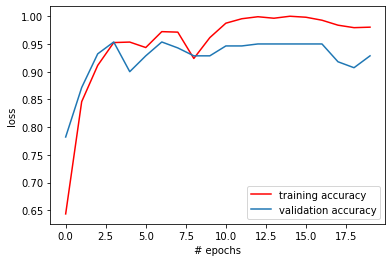

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

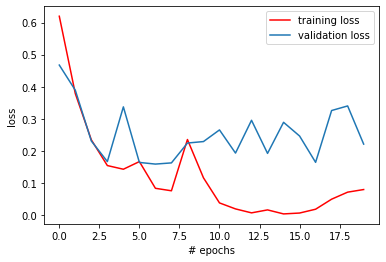

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**#Printing the model accuracy**

In [ ]:
print(model.evaluate(test_x,test_y))

280/280 [==============================] - 21s 74ms/step
[0.2214627193553107, 0.9285714030265808]


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

Using TensorFlow backend.


**#Importing the libraries for API**

In [ ]:
from keras.models import load_model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from PIL import Image
import io

**#For accessing webcam on google colab**

In [ ]:
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);

      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.8);
            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

def byte2image(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def image2byte(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

**#Loading the model and executing the phase**

In [ ]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

VideoCapture()
eval_js('create()')

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(255,0,0)}

while(True):

    byte=eval_js('capture()')
    img=byte2image(byte)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        acc=round(np.max(result,axis=1)[0]*100,2)
        cv2.putText(img,str(acc),(x+150,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    eval_js('showimg("{}")'.format(image2byte(img)))   